# Introduction

Attending to Colleg undoubtedly have an impact on people´s lives, 
also those people that went to college make an impact of their own 
on others persons, communities and workplace.

I want to know if going to college makes a difference in Baseball players, their teams and their income as professional players. These are the questions I want to answer with this analysis:

    1. On a yearly basis, does Baseball players who attended to college have greater income compared to those who didn't?

    2. Having more College graduated players makes teams more successful during Regular Seasson?

    3. Having College graduated player gives teams better chance to win World Series?
    
### Independet Variable
 Player who attended to college
 
### Dependent Variables
    1. Income of players
    2. Performance of the teams
    3. Chance of winning World Series


In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Loads important files for this analysis

filename = 'baseballdatabank-2017.1\core\Teams.csv'
teams_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\TeamsFranchises.csv'
franchise_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Salaries.csv'
salaries_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Master.csv'
master_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\CollegePlaying.csv'
college_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Schools.csv'
schools_df = pd.read_csv(filename)

In [87]:
#In the master table get those players who went to college or not

#this dataframe will be used as index array to substract players from the master table
alist = {'went_to_college':[False]*len(master_df.index)}
went = pd.DataFrame(alist)

for index, row in master_df.iterrows():
    playerID = row['playerID']
    if playerID in college_df.playerID.values:
        went.iloc[index]['went_to_college'] = True
        
#append the new column to the original dataFrame
master_df = master_df.assign(went_to_college=went)        

In [88]:
#get players who attended to college and those who didn't
college_playing = master_df[master_df['went_to_college']]
non_college_playing = master_df[master_df['went_to_college']==False]


In [89]:
#now get the salaries of the players to describe and compare
#create an index dataFrame of the ssalaries table to splti the table
#no need to append this column to that table

alist = {'went_to_college':[False]*len(salaries_df.index)}
salaries_college = pd.DataFrame(alist)

for index, row in salaries_df.iterrows():
    playerID = row['playerID'] 
    if playerID in college_playing['playerID'].values:
        salaries_college.iloc[index]['went_to_college'] = True
    

college_player_salaries = salaries_df[salaries_college['went_to_college']]
non_college_player_salaries = salaries_df[salaries_college['went_to_college']==False]



In [101]:
%pylab inline



college_salaries2016 = college_player_salaries[college_player_salaries.yearID==2016]
non_college_salaries2016 =  non_college_player_salaries[non_college_player_salaries.yearID==2016]

college_salaries2015 = college_player_salaries[college_player_salaries.yearID==2015]
non_college_salaries2015 =  non_college_player_salaries[non_college_player_salaries.yearID==2015]

college_salaries2014 = college_player_salaries[college_player_salaries.yearID==2014]
non_college_salaries2014 =  non_college_player_salaries[non_college_player_salaries.yearID==2014]
#xticks(college_salaries2016.salary.values)



Populating the interactive namespace from numpy and matplotlib


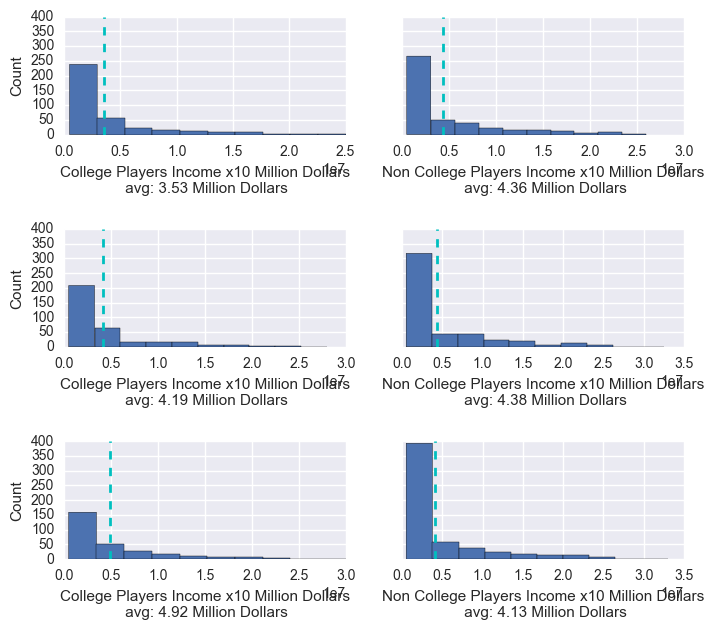

In [164]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 7), sharey=True,sharex=False)

alist = [college_salaries2014 , college_salaries2015, college_salaries2016]
blist = [non_college_salaries2014 , non_college_salaries2015, non_college_salaries2016]
ax = 0

xlabel = '{0}College Players Income x10 Million Dollars\n avg: {1:.2f} Million Dollars'


for ax in range( len(alist)):
    
    axes[ax,0].set_ylabel('Count')
    
    adf = alist[ax]
    
    meanmd = adf.salary.values.mean() /1000000
    axes[ax,0].set_xlabel(xlabel.format('', meanmd  ))
    axes[ax,0].hist(adf.salary.values)
    axes[ax,0].axvline(adf.salary.values.mean(), color='c', linestyle='dashed', linewidth=2)
    
    adf = blist[ax]
    meanmd = adf.salary.values.mean() /1000000
    axes[ax,1].set_xlabel(xlabel.format('Non ', meanmd  ))
    axes[ax,1].hist(adf.salary.values)
    axes[ax,1].axvline(adf.salary.values.mean(), color='c', linestyle='dashed', linewidth=2)

    ax = ax + 1


fig.subplots_adjust(hspace = 0.8)

### At first glance
In the above graphics, we can see an increase in the average income,<br>
of the group of player who attended to college, but in that same window of time,<br>
those players who did not attend college had a better average income at first<br> 
and then in the year 2016, college players were better paid.

Another thing to notice is that in the group of players that did not attend to college<br>
there are considerably more players with income of fewer than 5 million dollars.

### What is the real tendency?
Let's find out plotting the mean for both groups over the years. Unfortunately, <br>
we can only plot this since the first year salaries were recorded.

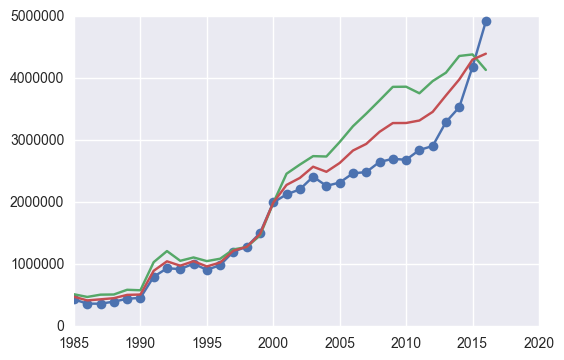

In [206]:
clgmeans  = college_player_salaries.groupby('yearID').salary.mean()
nclgmeans = non_college_player_salaries.groupby('yearID').salary.mean()
allmean   =  salaries_df.groupby('yearID').salary.mean()


l1 = plt.plot(clgmeans,label='College', marker='o')
l2 = plt.plot(nclgmeans, label='Non College')
l3 = plt.plot(allmean, label='All', marker='+')



The Line in gree represents

In [94]:
#get only winners of the world series?
winners = teams_df[teams_df.WSWin=='Y']
print len(winners)
print winners.W.mean()
print teams_df.W.mean()

lossers = teams_df[teams_df.WSWin=='N']
print len(lossers)
print lossers.W.mean()
print lossers.W.describe()
print ''
print winners.W.describe()

print ''

winners = winners.sort_values(by='yearID',ascending=False)




117
96.3418803419
74.8141093474
2361
76.8284625159
count    2361.000000
mean       76.828463
std        13.774847
min        12.000000
25%        68.000000
50%        78.000000
75%        87.000000
max       116.000000
Name: W, dtype: float64

count    117.000000
mean      96.341880
std        7.293316
min       63.000000
25%       92.000000
50%       97.000000
75%      101.000000
max      114.000000
Name: W, dtype: float64



In [51]:
#count number of WS won by team
wincount = pd.Series()
for index, row in winners.iterrows():
    teamid = row['teamID']
    if teamid not in wincount:
        wincount[teamid] = 1
    else:
        wincount[teamid] = wincount[teamid] + 1

        #sort
sortedWin =  wincount.sort_values(ascending=False)

#get top 2
top = sortedWin.index[0]
scnd = sortedWin.index[1]

print top +', '+ scnd



NYA, SLN


In [52]:

fname1 = teams_df[teams_df.teamID==top].franchID.iloc[0]
fname2 = teams_df[teams_df.teamID==scnd].franchID.iloc[0]

print franchise_df[franchise_df.franchID==fname1]
print franchise_df[franchise_df.franchID==fname2]


   franchID        franchName active NAassoc
74      NYY  New York Yankees      Y     NaN
   franchID           franchName active NAassoc
99      STL  St. Louis Cardinals      Y     NaN


count    8.530000e+02
mean     4.396410e+06
std      5.900036e+06
min      5.075000e+05
25%      5.200000e+05
50%      1.500000e+06
75%      6.000000e+06
max      3.300000e+07
Name: salary, dtype: float64


(array([ 558.,  114.,   60.,   44.,   24.,   19.,   21.,    7.,    3.,    3.]),
 array([   507500.,   3756750.,   7006000.,  10255250.,  13504500.,
         16753750.,  20003000.,  23252250.,  26501500.,  29750750.,
         33000000.]),
 <a list of 10 Patch objects>)

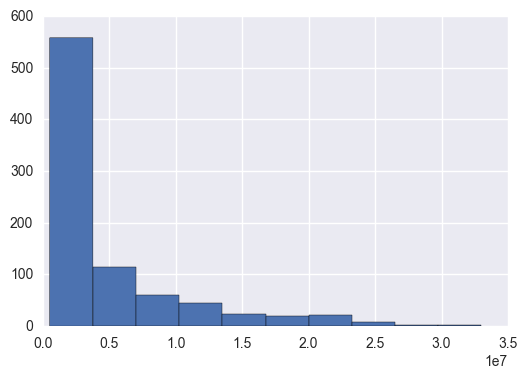

In [131]:

salaries2016 = salaries_df[salaries_df.yearID==2016]

print salaries2016['salary'].describe()
plt.hist(salaries2016['salary'])

In [132]:
rich = salaries2016['salary'].idxmax()
poor = salaries2016['salary'].idxmin()

richID = salaries2016.loc[rich]['playerID']
poorID = salaries2016.loc[poor]['playerID']

idxplayer =  master_df[master_df.playerID == richID].index
playerName = master_df.loc[idxplayer].nameFirst + ' ' + master_df.loc[idxplayer].nameLast
print "%s, %f " % (playerName , salaries2016.loc[rich]['salary'])

print ''

idxplayer =  master_df[master_df.playerID == poorID].index
playerName = master_df.loc[idxplayer].nameFirst + ' ' + master_df.loc[idxplayer].nameLast
print "%s, %f " % (playerName , salaries2016.loc[poor]['salary'])


9057    Clayton Kershaw
dtype: object, 33000000.000000 

830    Jake Barrett
dtype: object, 507500.000000 
